In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df=pd.read_csv(r"Downloads/combined_cycle_power_plant.csv",sep=';')

In [3]:
df

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [4]:
df.head()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


Data Exploration , Domain Knowledge,gather more relevant data from business or from outside 

Data Cleaning -check for missing values ,check for duplicates ,check for un realistic values 

Feature Engineering
Feature Extraction-extract inportant information from data
Feature Selection- select the most important feature to predict label

Pre Processing- changing format of data so that it can be processed by Machine Learning algorithm

Apply Machine Learning Algorithm

Performance Analysis

Tuning - improvement in performance of ML model

Export the trained model for production

Deployement to Production

Monitoring of performance in Production



In [5]:
# Gives statistical information
df.describe()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
df.shape   # To find the no of rows n columns

(9568, 5)

In [7]:
df.dtypes  # To find the datatype

temperature          float64
exhaust_vacuum       float64
ambient_pressure     float64
relative_humidity    float64
energy_output        float64
dtype: object

In [8]:
df.isnull().sum()  # To find the null value

temperature          0
exhaust_vacuum       0
ambient_pressure     0
relative_humidity    0
energy_output        0
dtype: int64

In [9]:
df=df.drop_duplicates()   #To drop the duplicates

In [10]:
df.shape   # Again check the shape now it varies from above as we have removed duplicate values

(9527, 5)

In [11]:
##EDA Part - We are taking conti bcoz my data is in continous form.
##We are converting all to list
conti=df.columns.tolist()   

In [12]:
conti

['temperature',
 'exhaust_vacuum',
 'ambient_pressure',
 'relative_humidity',
 'energy_output']

count    9527.000000
mean       19.658225
std         7.444397
min         1.810000
25%        13.530000
50%        20.350000
75%        25.710000
max        37.110000
Name: temperature, dtype: float64


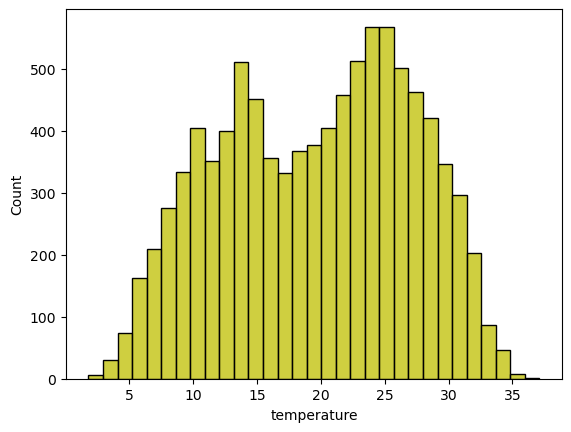

count    9527.000000
mean       54.293421
std        12.686309
min        25.360000
25%        41.740000
50%        52.080000
75%        66.510000
max        81.560000
Name: exhaust_vacuum, dtype: float64


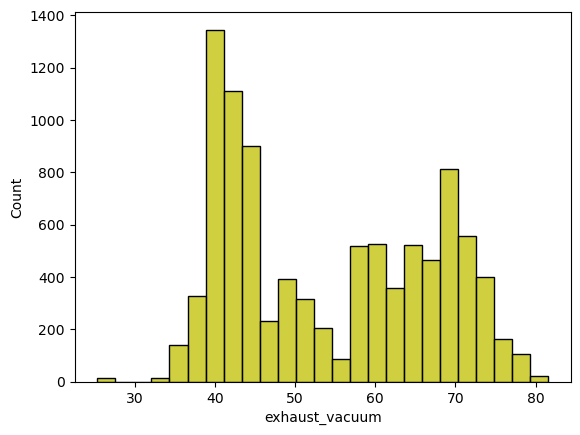

count    9527.000000
mean     1013.237084
std         5.940526
min       992.890000
25%      1009.085000
50%      1012.920000
75%      1017.200000
max      1033.300000
Name: ambient_pressure, dtype: float64


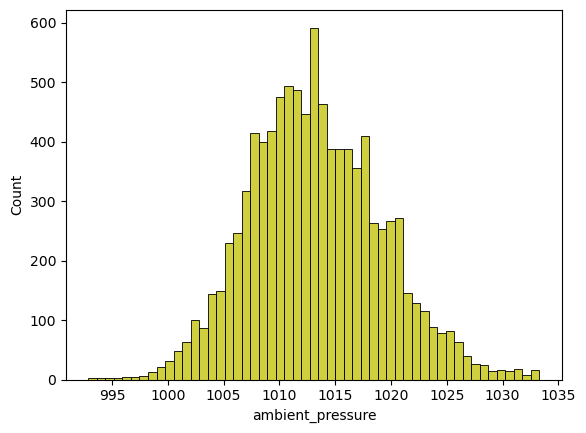

count    9527.000000
mean       73.334951
std        14.607513
min        25.560000
25%        63.375000
50%        75.000000
75%        84.850000
max       100.160000
Name: relative_humidity, dtype: float64


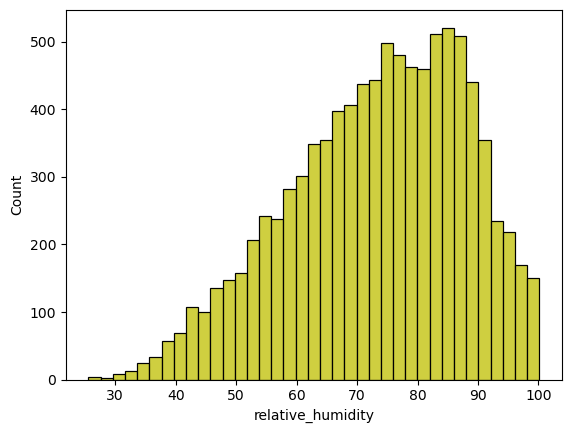

count    9527.00000
mean      454.33591
std        17.03908
min       420.26000
25%       439.75000
50%       451.52000
75%       468.36500
max       495.76000
Name: energy_output, dtype: float64


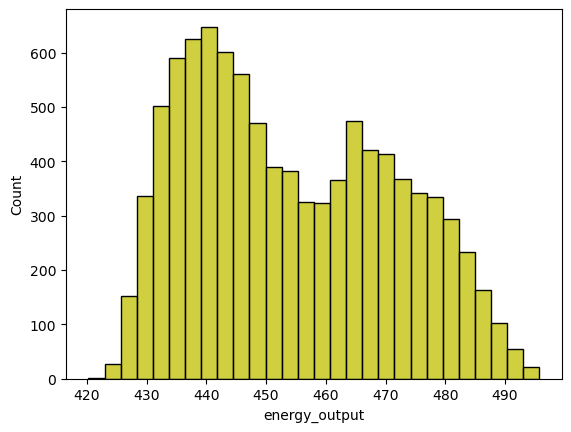

In [14]:
# Here we have to create histogram for each varaible
for i in conti:
    print(df[i].describe())   # Statistical description of each variable. here i means each variable of list
    sns.histplot(x=i,data=df,color='y') # x is representing each variable i and data is the file created
                                       #data is the parameter and df is variable passed
    plt.show()


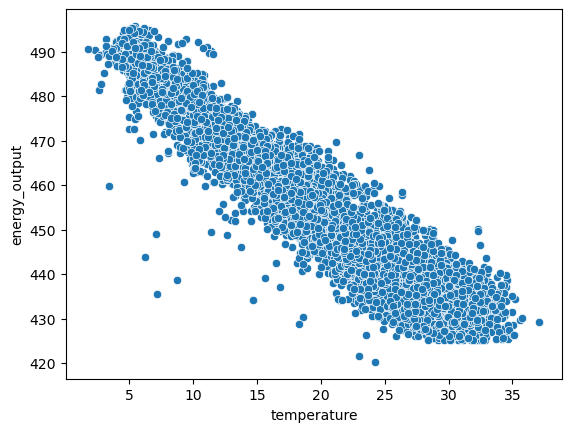

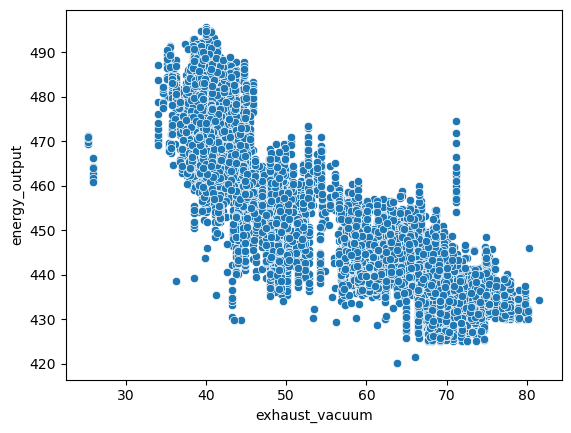

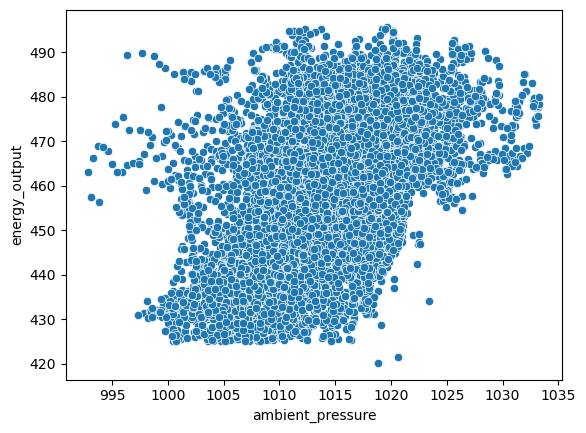

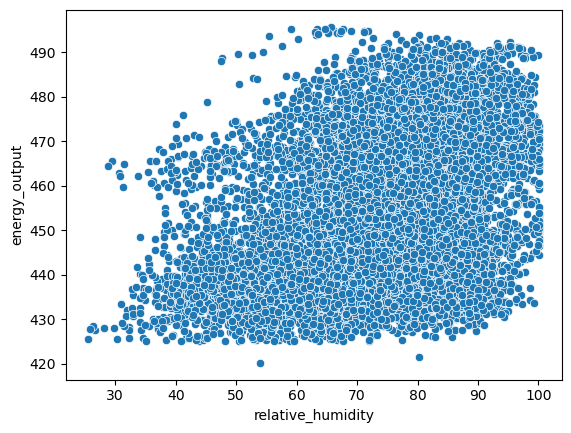

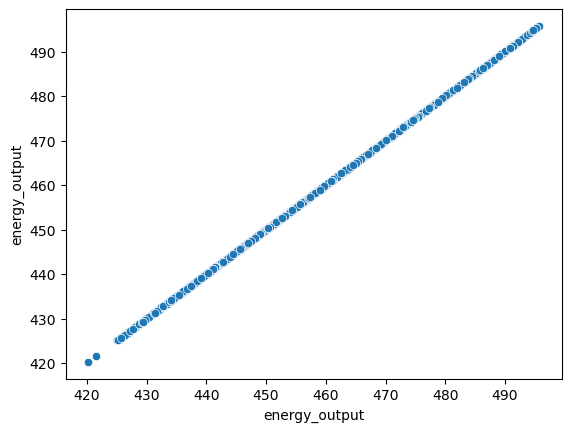

In [15]:
# Here we check the behavoiur of independent variable on dependent variable
# Basically we are generating a comparion chart  here
for i in conti:
    sns.scatterplot(x=i,y='energy_output',data=df) # X has independent variable n y has dependent variable
    plt.show()
# First graph tells EO is max at lowest temp so -ve relation is there
# Second graph tells EO is genertaing in clusters ie 35-45, 45-55, 55-80 but overall behavoiur is -ve ie if we increae EO
  # my exhaust vaccum decline
# Third graph tells us if we increase the value of ambient pressure my EO is also increasing & we are getting max o/p at
#  120-130 but in range of 1000-1020 the energy is almost stable means it goes up and down
# Fourth graph tells us +ve relation as when we increase value of relative humidity my EO is also increasing
# Fifth graph tells us when we compare with self it is always a linear graph

Here above in EDA we have seen that 2 variales are having -ve relation & 2 are having +ve relation. so in order to find the 
values of -ve and +ve we need to find co realtion of variables

In [16]:
cor=df.corr()

In [17]:
cor

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
exhaust_vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
ambient_pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
relative_humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
energy_output,-0.947908,-0.869900,0.518687,0.391175,1.000000


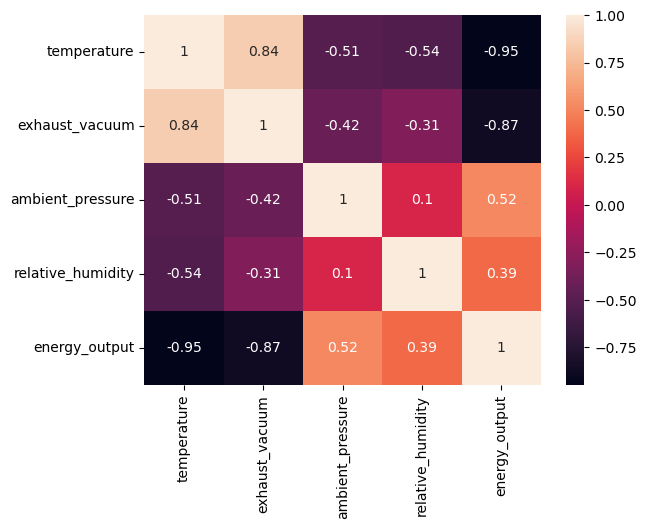

In [18]:
sns.heatmap(cor,annot=True)
plt.show()   
# Darker the color represent -ve corelation n lighter the color represent +ve corelation

In [19]:
# Implement the Algorithm
# To work on it we need x& y where x has all independent variable while y is dependent variable
x=df.drop('energy_output',axis=1)
y=df['energy_output']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8) 
# Majorly train & test size is of three type
#Train size       Test Size
#75               25
#80               20
#90               10
# We can also mention test size also ie test_size=0.25 

In [22]:
print(xtrain.shape)
print(ytrain.shape)

(7621, 4)
(7621,)


In [23]:
print(xtest.shape)
print(ytest.shape)

(1906, 4)
(1906,)


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# Create the object for class
model=LinearRegression()

In [26]:
# Fit is used to make the algo learn from the train dataset
model.fit(xtrain,ytrain)

LinearRegression()

In [27]:
# Now we apply the formulae ie y=mx+c where m is coefficiant & c is intercept
model.intercept_

453.71262158207935

In [28]:
# As we know there is 4 values of x so it is m1,m2,m3,m4
model.coef_
 
# Also we get differnet values from other bcoz train & test data is done in random manner ie have different data points

array([-1.97196825, -0.23391166,  0.06274008, -0.15597794])

In [29]:
# Now create one variable ie ypred for predicting y value so pass it xtest
ypred=model.predict(xtest)


#Remenber prediction is done on xtest & accuracy is calculated on ytest

In [30]:
ypred

array([465.368207  , 459.08437235, 448.20486154, ..., 471.95590779,
       454.42323766, 434.52925379])

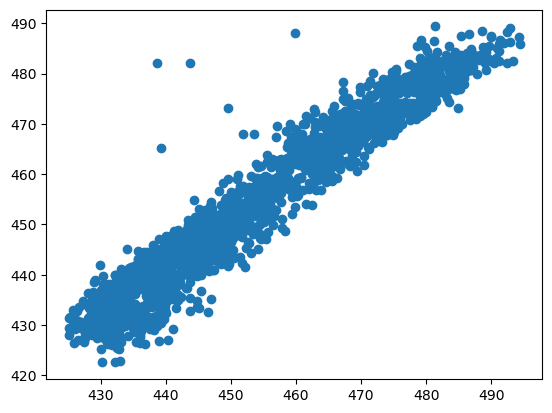

In [31]:
# Assumptions to be made that my model is performing good
#Plot a scatter plot for regression
plt.scatter(ytest,ypred)

# in graph we are getting that datapoints are in linear order so this means that we are going in correct directions

In [32]:
# calculate Residual means error
residual=ytest-ypred
residual

8572    5.631793
483    -1.104372
2693    1.285138
9532    2.328449
5090    6.902193
          ...   
2899   -3.508016
5041    3.775095
3476    1.704092
3899   -1.153238
2419   -2.489254
Name: energy_output, Length: 1906, dtype: float64

C:\Users\hi\AppData\Local\Temp\ipykernel_2272\1255217030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


<Axes: xlabel='energy_output', ylabel='Density'>

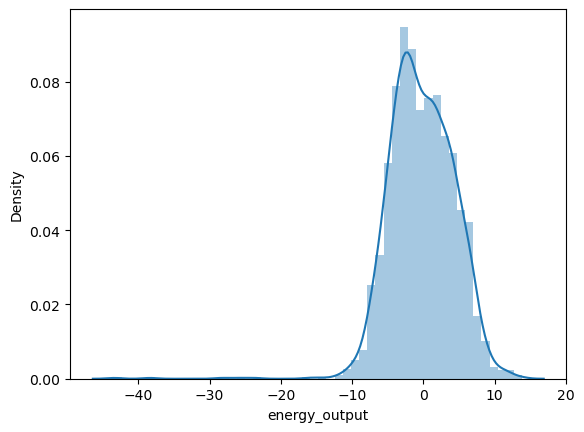

In [33]:
# Plot this residual
sns.distplot(residual,kde=True)

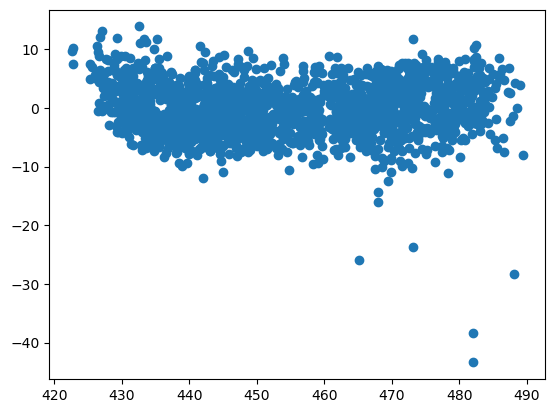

In [34]:
plt.scatter(ypred,residual)

In [35]:
from sklearn.metrics import mean_absolute_error,r2_score

# Mean absolute error gives error part of the model while R2 score will give accuracy of model

In [36]:
print(mean_absolute_error(ytest,ypred))

3.564841394468479


In [37]:
score =(r2_score(ytest,ypred))
print(score)
#R2 score is the value we get when we apply the linear regression. This value tells us how close the data is to the regression line

0.9294830547766759


In [38]:
# calculate Adjusted R2 so for that no such lib is there so just apply the formula
1-(1-score)* (len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)


# here adjusted r2 is less than r2 . this means model is good

0.9293346761439072

Then we apply joblib bcoz we have already completed the dataset and then we want to add new values to the dataset
so in order to check the accuracy we will use this

In [40]:
import joblib

In [41]:
joblib.dump(model,'ccpp-model.pkl')

['ccpp-model.pkl']

In [42]:
test1=[[20,100,90,260]]

In [43]:
var=joblib.load('ccpp-model.pkl')

In [44]:
test1_pred=var.predict(test1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
print(test1_pred)

[355.97443411]
